## Bitcoin Price Prediction

In [90]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [91]:
#Reading data from excel file.
df = pd.read_excel("../datasets/BTC.xlsx")
df.columns

Index(['Date', 'Price', 'Volume', 'Market Cap', 'Velocity', 'Coin Supply'], dtype='object')

In [92]:
#Checking the min and max date. 
print("Max Date in dataset", df['Date'].min()
      ,"\nMin Date in dataset ",df['Date'].max())

d0 = df['Date'].min()
d1 = df['Date'].max()
numOfDays = d1 - d0
print("Number of days in the dataset", numOfDays.days)
totalRows = df.shape
print("Number of total record", totalRows)

Max Date in dataset 2014-12-27 00:00:00 
Min Date in dataset  2018-11-15 00:00:00
Number of days in the dataset 1419
Number of total record (1420, 6)


Below are the observations:
1: Not a single date is missing from the dataset. i.e. we have all days data from maximun date to minimum date. 
2: No duplicate date is present. 

In [93]:
## Take the only date and price columns as of now.
df_1=df[['Date','Price']]

In [94]:
df_1 = df_1.sort_values('Date')

In [95]:
df_1.isnull().sum()

Date     0
Price    0
dtype: int64

In [96]:
df_1 = df_1.set_index('Date')
df_1.index

DatetimeIndex(['2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05',
               ...
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13',
               '2018-11-14', '2018-11-15'],
              dtype='datetime64[ns]', name='Date', length=1420, freq=None)

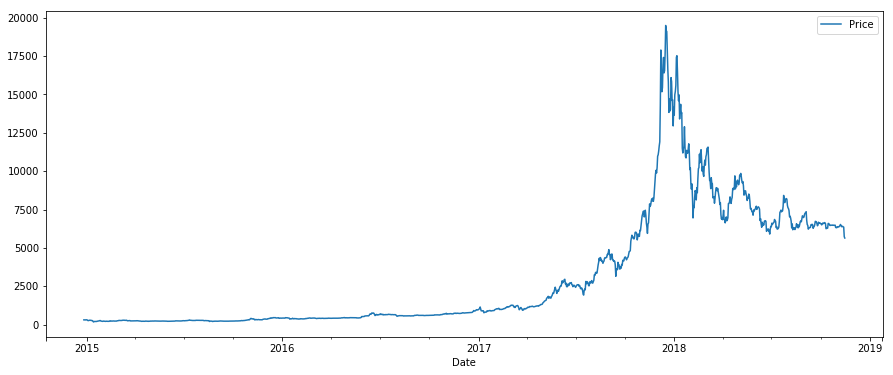

In [97]:
df_1.plot(figsize=(15, 6))
plt.show()

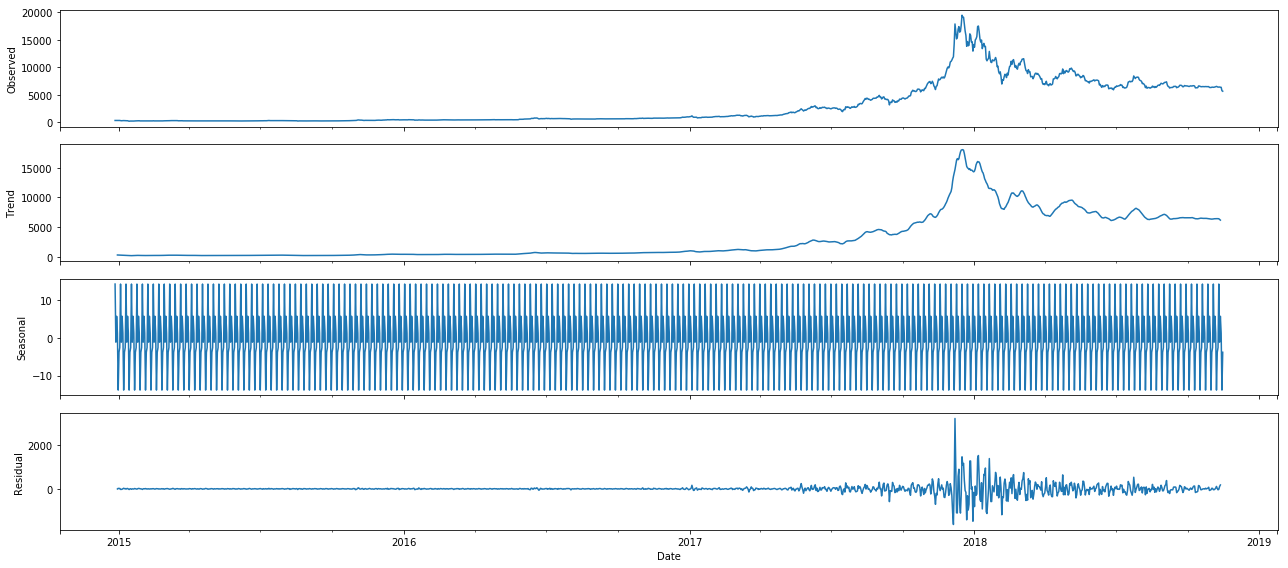

In [98]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_1, model='additive')
fig = decomposition.plot()
plt.show()

Below are the observation:
    By looking at the above graph, there is no seasonality factor involed in the data. 
    Also there is no definate trend except 2018.
    

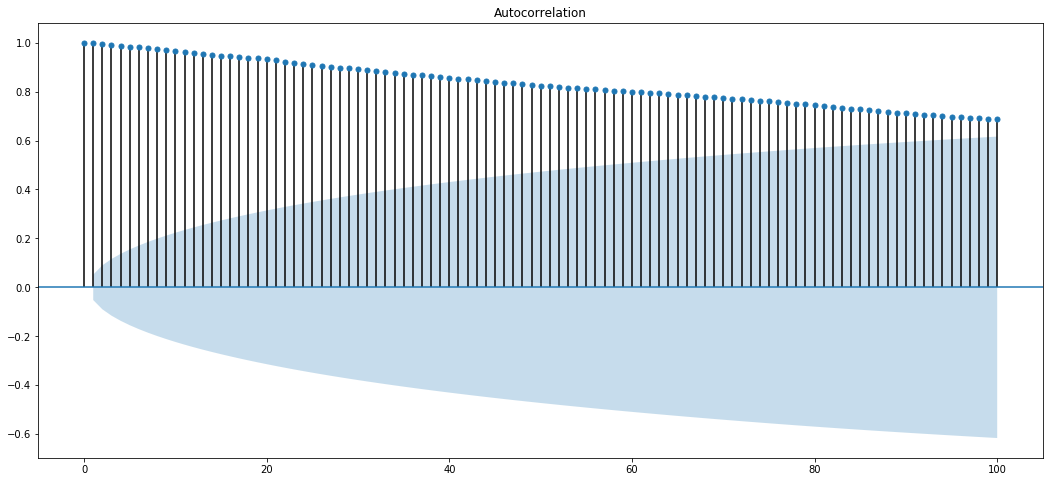

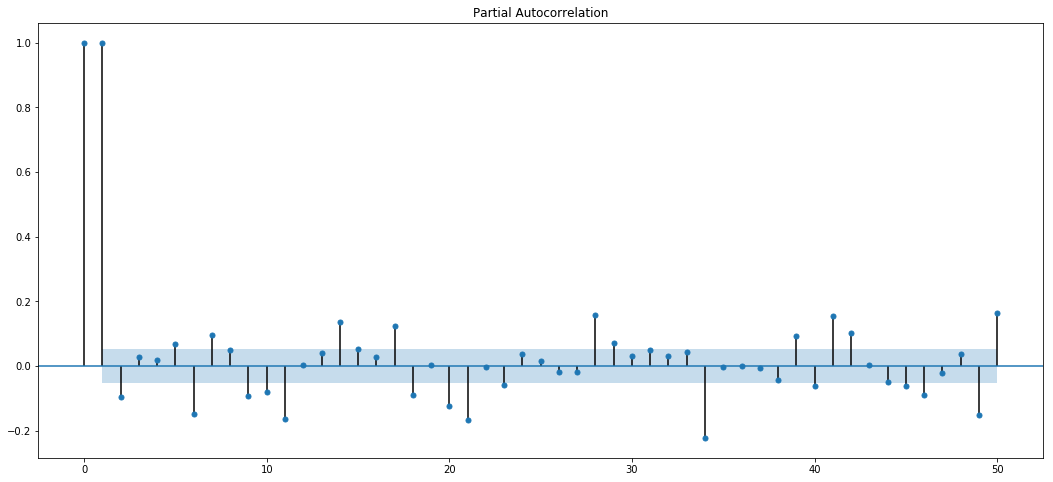

In [99]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# plot_acf(df_1)
# plot_pacf(df_1)
plot_acf(df_1, lags=100)
plot_pacf(df_1,lags=50)
pyplot.show()
## It seems Autocorrelation is crossing 150.  

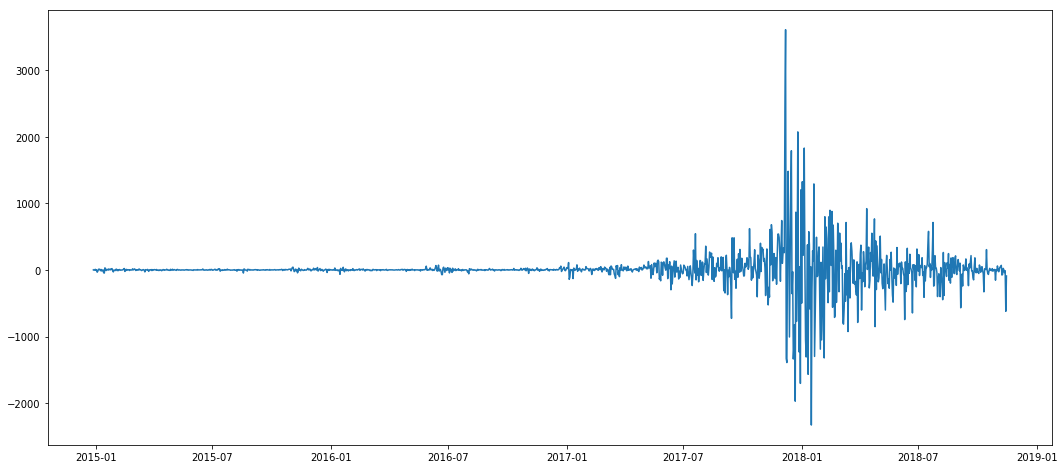

In [102]:
# df_1.diff(2)
diff = df_1.diff(1)
pyplot.plot(diff)
pyplot.show()
# not able to make this series with even 4 lags. 

/home/gaurang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 1405
Model:                     ARMA(5, 1)   Log Likelihood               -9902.441
Method:                       css-mle   S.D. of innovations            277.882
Date:                Wed, 09 Jan 2019   AIC                          19820.882
Time:                        19:13:03   BIC                          19862.864
Sample:                    12-27-2014   HQIC                         19836.573
                         - 10-31-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3030.4714   2169.889      1.397      0.163   -1222.433    7283.376
ar.L1.Price     0.5291      0.094      5.653      0.000       0.346       0.713
ar.L2.Price     0.4724      0.102      4.646    

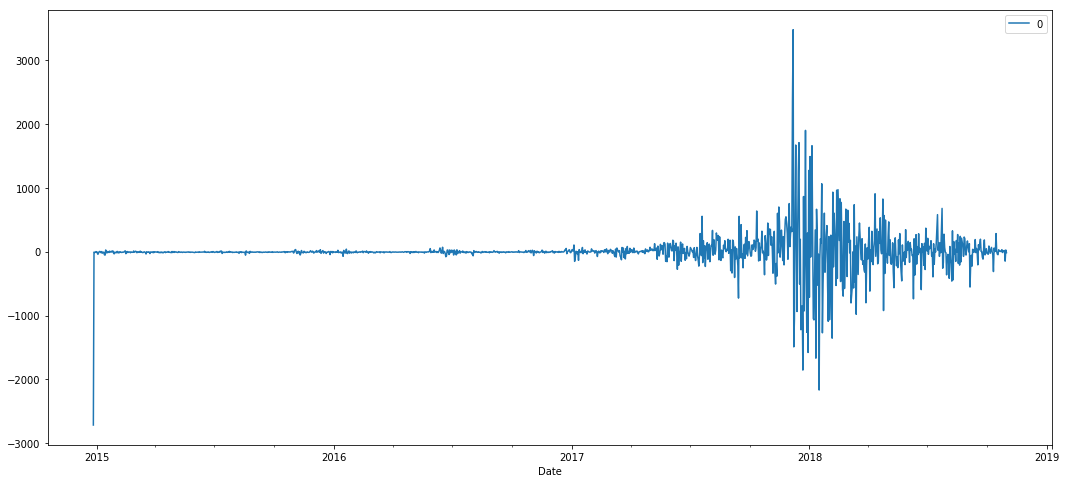

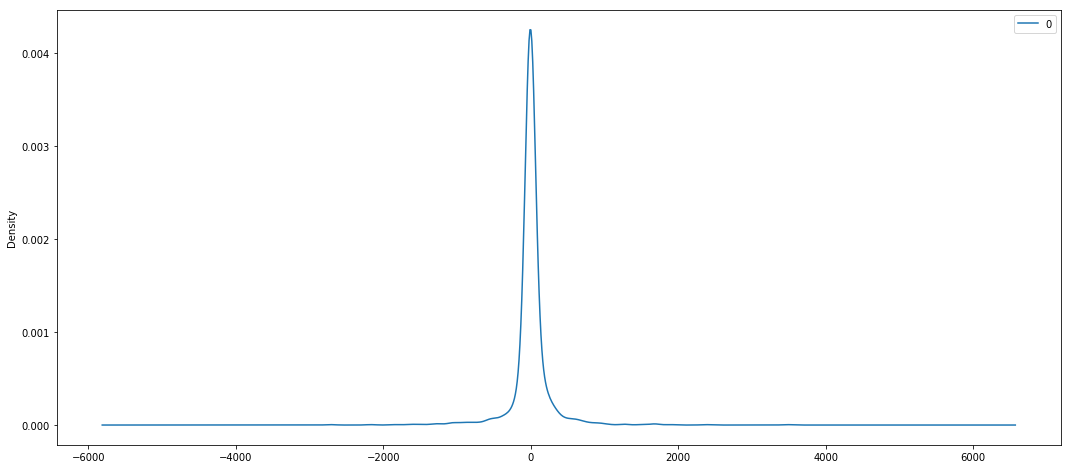

                 0
count  1405.000000
mean      2.433492
std     287.204242
min   -2714.611429
25%     -14.223547
50%      -5.462349
75%      15.717285
max    3475.882510


In [215]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from math import sqrt
import numpy as np
# Spliting the data. Test data has last 15 days records; rest all are in train data
test_data = df_1['2018-11':]
train_data =df_1[:'2018-10']

# p=50,100,120
# d=1
# q=2
# Not able to run for 50 lags as it is lots of time to build the model.
model = ARIMA(train_data, order=(5,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


In [216]:
## Lets predict for the last 15 days. 
predictions = model_fit.predict(start=test_data.index[0],end=test_data.index[-1])
print("predictions data\n",predictions)
print("test data\n",test_data)
print(predictions.shape)
error = sqrt(mean_squared_error(test_data, predictions))
# mse = mserror((test_data,predictions)
print('Test RMSE: %.3f' % error)

predictions data
 2018-11-01    6306.270431
2018-11-02    6313.234167
2018-11-03    6296.025006
2018-11-04    6292.035783
2018-11-05    6280.736718
2018-11-06    6271.693751
2018-11-07    6263.762037
2018-11-08    6254.175801
2018-11-09    6246.109201
2018-11-10    6237.096614
2018-11-11    6228.500148
2018-11-12    6219.873751
2018-11-13    6211.167589
2018-11-14    6202.623400
2018-11-15    6193.997647
Freq: D, dtype: float64
test data
               Price
Date               
2018-11-01  6377.78
2018-11-02  6388.44
2018-11-03  6361.26
2018-11-04  6376.13
2018-11-05  6419.66
2018-11-06  6461.01
2018-11-07  6530.14
2018-11-08  6453.72
2018-11-09  6385.62
2018-11-10  6409.22
2018-11-11  6411.27
2018-11-12  6371.27
2018-11-13  6359.49
2018-11-14  5738.35
2018-11-15  5648.03
(15,)
Test RMSE: 235.097


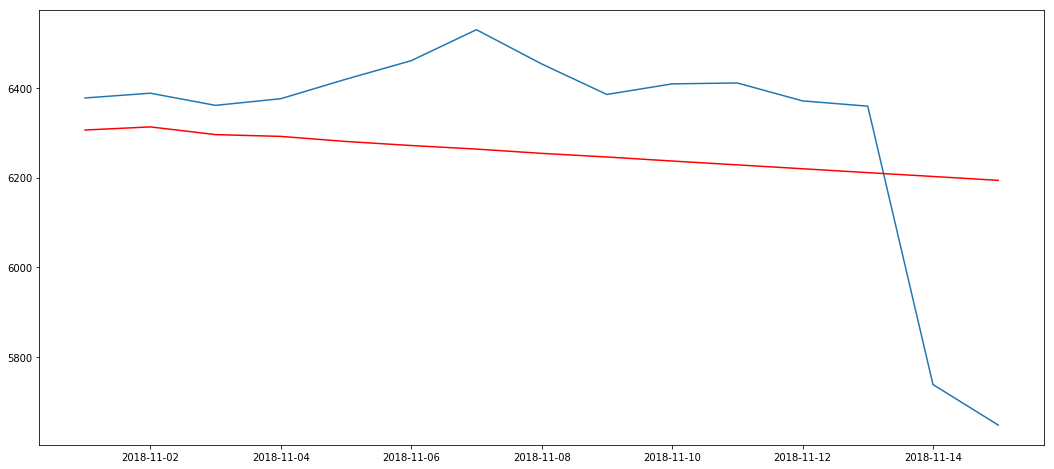

In [218]:
# plot for prediction vs actual
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()